In [1]:
import numpy as np
import matplotlib
from matplotlib.ticker import MaxNLocator, FixedLocator, LinearLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Ellipse
import matplotlib.cm as cm
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
font0 = FontProperties()
font = font0.copy()
font.set_size(30)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(24)
labelfont.set_weight('bold')

legendfont=font0.copy()
legendfont.set_size(16)
legendfont.set_weight('bold')

In [2]:
redcol='#e41a1c'
bluecol='#1f78b5'
grncol='#33a12c'
purcol='#613d9b'
pinkcol='#fc9b9a'
orcol='#ff7f00'

In [3]:
def flushalign(ax):
    ic = 0
    for l in ax.get_yticklabels():
        if ic == 0:
            l.set_va("bottom")
        elif ic == len(ax.get_yticklabels())-1:
            l.set_va("top")
        ic += 1

    ic = 0
    for l in ax.get_xticklabels():
        if ic == 0:
            l.set_ha("left")
        elif ic == len(ax.get_xticklabels())-1:
            l.set_ha("right")
        ic += 1

In [36]:
MuB_Dis = np.loadtxt("./DisappChi2_Full.dat")

dm41V = np.unique(MuB_Dis.T[0])
ssqthV = np.unique(MuB_Dis.T[1])
ch2V_NuE = (MuB_Dis.T[2]).reshape(len(dm41V), len(ssqthV))
ch2V_NuMu = (MuB_Dis.T[3]).reshape(len(dm41V), len(ssqthV))
ch2V_NuE_C = (MuB_Dis.T[4]).reshape(len(dm41V), len(ssqthV))
ch2V_NuMu_C = (MuB_Dis.T[5]).reshape(len(dm41V), len(ssqthV))

In [37]:
print([np.min(ch2V_NuE), np.max(ch2V_NuE)])
print(np.argmin(ch2V_NuE))
print(MuB_Dis[0])
print(MuB_Dis[np.argmin(ch2V_NuE)])
print(MuB_Dis[0][2] - np.min(ch2V_NuE))

[83.41306748678903, 794.4410309313137]
8719
[1.00000000e-02 1.00000000e-04 8.57756427e+01 8.57756153e+01
 1.87762953e+01 1.87763013e+01]
[4.73151259e+00 3.98107171e-02 8.34130675e+01 1.44599447e+02
 1.78815697e+01 2.69274221e+01]
2.3625752505082716


In [38]:
print([np.min(ch2V_NuMu), np.max(ch2V_NuMu)])
print(np.argmin(ch2V_NuMu))
print(MuB_Dis[0])
print(MuB_Dis[np.argmin(ch2V_NuMu)])
print(MuB_Dis[0][3] - np.min(ch2V_NuMu))

[85.68436758899222, 61796.99467402661]
1208
[1.00000000e-02 1.00000000e-04 8.57756427e+01 8.57756153e+01
 1.87762953e+01 1.87763013e+01]
[2.23872114e-02 5.01187234e-01 8.57928006e+01 8.56843676e+01
 1.87718865e+01 1.88169705e+01]
0.09124769974961566


In [39]:
print([np.min(ch2V_NuE_C), np.max(ch2V_NuE_C)])
print(np.argmin(ch2V_NuE_C))
print(MuB_Dis[0])
print(MuB_Dis[np.argmin(ch2V_NuE_C)])
print(MuB_Dis[0][4] - np.min(ch2V_NuE_C))

[13.563347390521752, 466.5141277529401]
7025
[1.00000000e-02 1.00000000e-04 8.57756427e+01 8.57756153e+01
 1.87762953e+01 1.87763013e+01]
[1.41253754e+00 8.91250938e-02 8.93880939e+01 2.57307399e+02
 1.35633474e+01 6.65724967e+01]
5.212947942398362


In [40]:
print([np.min(ch2V_NuMu_C), np.max(ch2V_NuMu_C)])
print(np.argmin(ch2V_NuMu_C))
print(MuB_Dis[0])
print(MuB_Dis[np.argmin(ch2V_NuMu_C)])
print(MuB_Dis[0][5] - np.min(ch2V_NuMu_C))

[18.592395604170054, 3843.6822051678405]
7905
[1.00000000e-02 1.00000000e-04 8.57756427e+01 8.57756153e+01
 1.87762953e+01 1.87763013e+01]
[2.66072506e+00 2.51188643e-02 8.66823849e+01 1.05424002e+02
 1.76323113e+01 1.85923956e+01]
0.18390567223435283


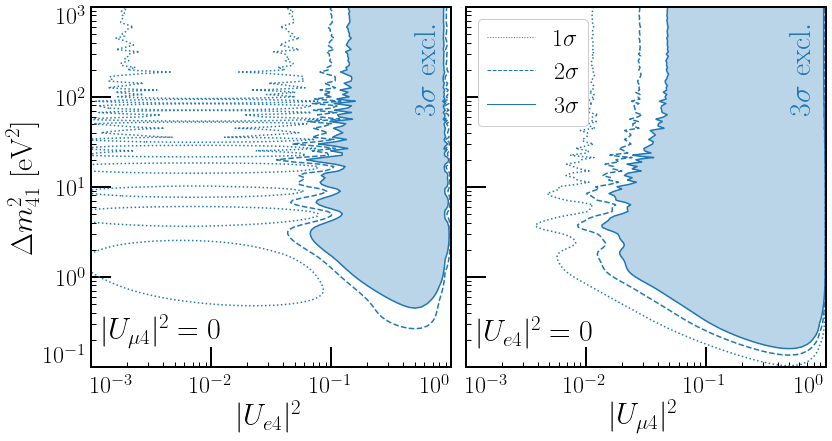

In [44]:
figwid = 5.0
fighei = 5.0
lside = 1.5
rside = 0.5
wwspace = 0.2

ncol = 2
nrow = 1

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 1.0
top = 0.5
hhspace = 0.05

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = 1e-3, 1, 1e-1, 1e3
ax = axes[0]
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=30)
ax.set_xlabel(r"$|U_{e4}|^2$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-1, 1, 10, 100, 1e3)))
ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=5, width=1)
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]

levs0 = np.min(ch2V_NuE)
levs = [levs0 + 2.3, levs0 + 6.18, levs0+11.83]
ax.contour(ssqthV, dm41V, ch2V_NuE, levels=levs, colors=['C0'], linestyles=[':','--', '-'])
levsC = [levs0+11.83, np.max(ch2V_NuE)]
ax.contourf(ssqthV, dm41V, ch2V_NuE, levels=levsC, colors=['C0'], alpha=0.3)

ax.annotate(r"$|U_{\mu 4}|^2 = 0$", xy=(xmin, ymin), xytext=(12,18), textcoords="offset points", ha="left", va="bottom", size=30, color='k')
ax.annotate(r"$3\sigma\ \mathrm{excl.}$", xy=(xmax, ymax), xytext=(-10, -15), textcoords="offset points", ha="right", va="top", size=30, color='C0', rotation=90)

flushalign(ax)

xmin, xmax, ymin, ymax = 1e-3, 1, 1e-1, 1e3
ax = axes[1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=30)
ax.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=font)        
ax.set_ylabel(r'', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-1, 1, 10, 100, 1e3)))
ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=5, width=1)
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(0) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]

levs0 = np.min(ch2V_NuMu)
levs = [levs0 + 2.3, levs0 + 6.18, levs0+11.83]
#levs = [levs0 + 6.18, levs0+11.83]
ax.contour(ssqthV, dm41V, ch2V_NuMu, levels=levs, colors=['C0'], linestyles=[':','--', '-'])
levsC = [levs0+11.83, np.max(ch2V_NuMu)]
ax.contourf(ssqthV, dm41V, ch2V_NuMu, levels=levsC, colors=['C0'], alpha=0.3)

levs0 = np.min(ch2V_NuMu_C)
levs = [levs0 + 2.3, levs0 + 6.18, levs0+11.83]
ax.annotate(r"$|U_{e4}|^2 = 0$", xy=(xmin, ymin), xytext=(12,18), textcoords="offset points", ha="left", va="bottom", size=30, color='k')
ax.annotate(r"$3\sigma\ \mathrm{excl.}$", xy=(xmax, ymax), xytext=(-10, -15), textcoords="offset points", ha="right", va="top", size=30, color='C0', rotation=90)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], ls=':', color='C0', lw=1, label=r'$1\sigma$')
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], ls='--', color='C0', lw=1, label=r'$2\sigma$')
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], ls='-', color='C0', lw=1, label=r'$3\sigma$')
ax.legend(loc=2, prop=labelfont, framealpha=1.0)
flushalign(ax)

In [45]:
fig.savefig("NuE_NuMu_Disappearance.pdf")